<a href="https://colab.research.google.com/github/adbioc/Jbook-journey/blob/main/videodyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 !apt install ffmpeg
 #!pip install moviepy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import os
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2



In [ ]:
 os.chdir("/content/drive/My Drive/thermal_video/")
 !ls
 

2020-02-27T124145430.seq   set1_dry_day2.avi
blood_27_02_20.csv	   set1_dry_day3.avi
blood_samp_details.txt	   set1_dry_day3later3hrs.avi
chickpeas.mp4		   set2_dry_day1.avi
chickpeas.mpeg		   set2_wet_day2.avi
MVIMG_20200227_172810.jpg  set2_wet_day3.avi
samp_details.txt	   set2_wt_day3later3hrs.avi
set1_dry_day1.avi	   videodyn.ipynb


In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
cap = cv2.VideoCapture('chickpeas.mpeg')
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frameCount


722

In [ ]:
# cv2.namedWindow('frame 10')
# cv2.imshow('frame 10', buf[9])

# cv2.waitKey(0)
fc = 0
ret = True
buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))
while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    fc += 1

cap.release()
buf.shape

(722, 422, 1012, 3)

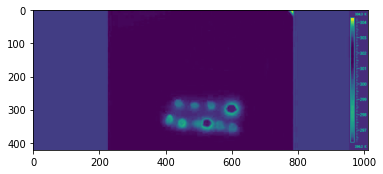

In [ ]:
plt.imshow(buf[0,:,:,0])

<built-in method mean of numpy.ndarray object at 0x7fb8538164b0>
12.86266924564797


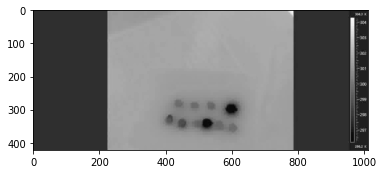

In [ ]:
grayFrame = cv2.cvtColor(buf[721,:,:,:], cv2.COLOR_BGR2GRAY)
plt.imshow(grayFrame,cmap ='gray')
ff=grayFrame[10:30,200:300]
print(ff.mean)
i,j = np.where((grayFrame>0)&(grayFrame<20))

AA= grayFrame[i,j]

print(AA.mean())

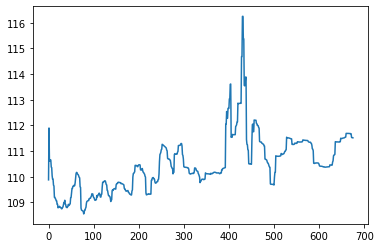

In [ ]:
time_series = np.zeros(676,)
for t in range(676):
    grayFrame = cv2.cvtColor(buf[t,:,:,:], cv2.COLOR_BGR2GRAY)
    # plt.imshow(grayFrame,cmap ='gray')
    # ff=grayFrame[10:30,200:300]

    i,j = np.where((grayFrame>0)&(grayFrame<255))
    AA= grayFrame[i,j]
    time_series[t] = AA.mean()
plt.plot(time_series)

In [ ]:
plt.hist(grayFrame.ravel())

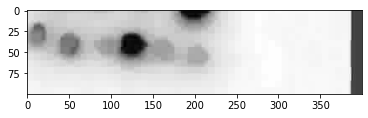

In [ ]:
h=100
w=400
x=400
y=300
crop_img = grayFrame[y:y+h, x:x+w]
crop_img.shape
plt.imshow(crop_img,cmap='gray')


In [ ]:
28.4+50*(32.2-28.4)/255

29.145098039215686